In [ ]:
import pandas as pd

file_path = "/TASK 2 (COMPLETE).csv"

try:
    df = pd.read_csv(file_path)
    print("File imported successfully!")
    print("\nDataFrame head:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

File imported successfully!

DataFrame head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

In [23]:
# for missing values
print("Missing values before handling:")
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())

# 'Embarked' imputation
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# checking missing values after handling
print("\nmissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [24]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [ ]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [25]:
survival_rate_by_sex = df.groupby('Sex', observed=True)['Survived'].mean()
survival_rate_by_pclass = df.groupby('Pclass', observed=True)['Survived'].mean()

print("Survival rate by Sex:")
print(survival_rate_by_sex)

print("\nSurvival rate by Pclass:")
print(survival_rate_by_pclass)

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [26]:
import warnings
warnings.filterwarnings('ignore')

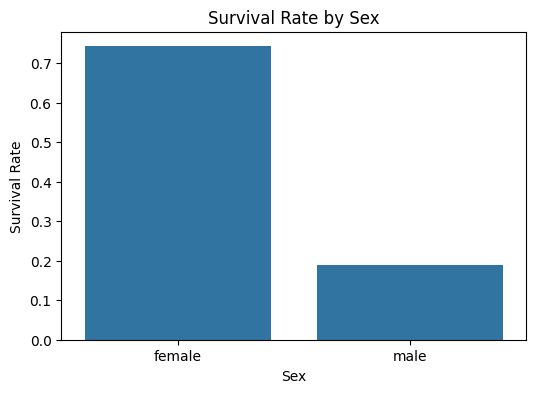

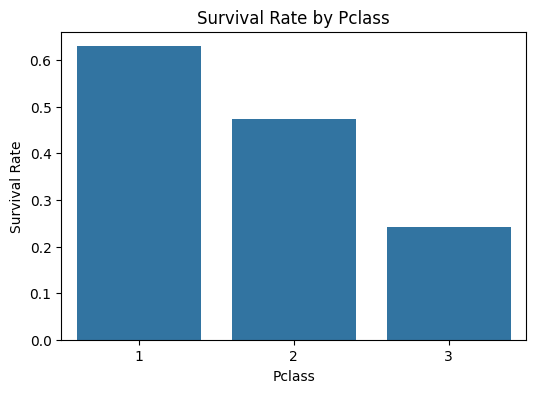

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot survival rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

# Plot survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.show()

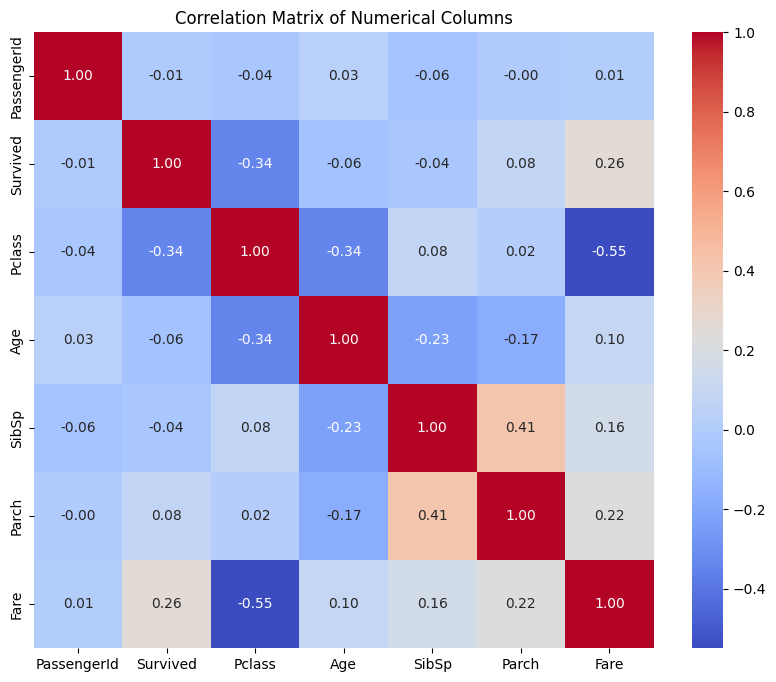

In [ ]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

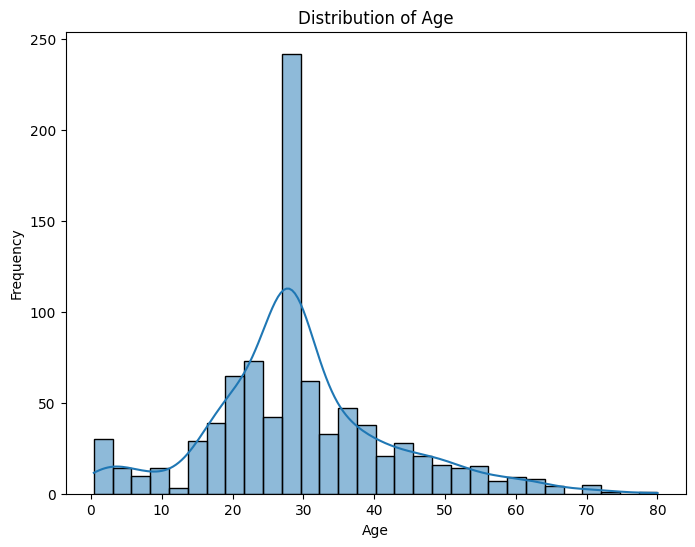

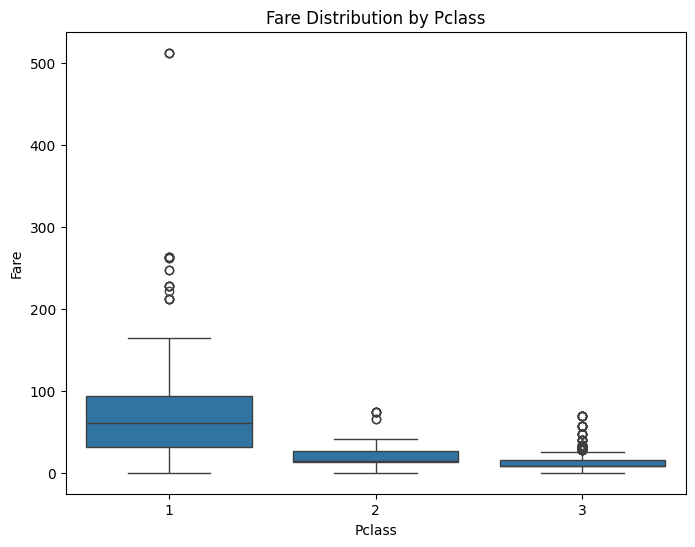

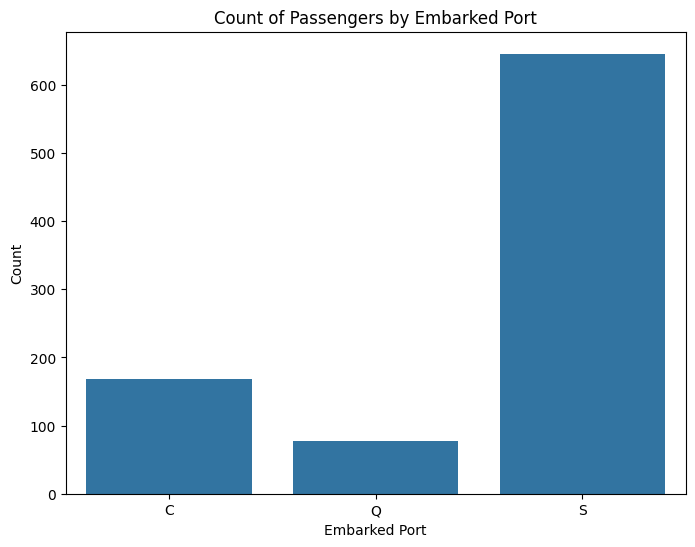

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Count of Passengers by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

# **Key Insights from the Titanic Exploratory Analysis**

The data cleaning phase was straightforward, primarily involving imputing missing ages with the mean and removing the heavily incomplete 'Cabin' column.

*The core analysis confirms two major factors driving survival:*

- **Gender Disparity:** The survival rate for women was exceptionally high (around $74\%$), while men faced a much lower chance (around $19\%$). This suggests that women and children were prioritized during rescue efforts.

-  **Class Privilege:** Passengers in First Class (Pclass $= 1$) had the highest probability of survival, roughly $63\%$. This rate dropped sharply for Third Class (Pclass $= 3$) passengers, confirming a strong correlation between economic class and rescue outcome, which is also visible on the correlation heatmap.

These strong relationships indicate that Gender and Passenger Class are the most powerful predictors for survival in this dataset.